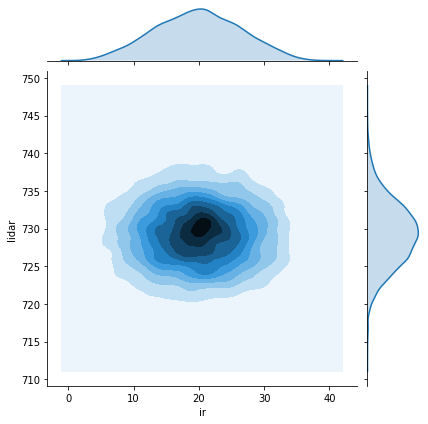

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("sensor_data_700.txt", delimiter=' ', header=None, names=("data", "time", "ir", "lidar"))

d = data[(data["time"] < 160000) & (data["time"] >= 120000)]
d = d.loc[:,["ir","lidar"]]

sns.jointplot(d["ir"], d["lidar"], d, kind="kde")
plt.show()

In [7]:
print("光センサの計測値の分散:",d.ir.var())
print("LiDARの計測値の分散:", d.lidar.var())

diff_ir = d.ir - d.ir.mean()
diff_lidar = d.lidar - d.lidar.mean()

a = diff_ir * diff_lidar

print("共分散:", sum(a)/(len(d) - 1))

d.mean()
d.cov()

光センサの計測値の分散: 42.117126367699505
LiDARの計測値の分散: 17.702026469211596
共分散: -0.31677803385436953


,ir,lidar
ir,42.117126,-0.316778
lidar,-0.316778,17.702026


In [8]:
from scipy.stats import multivariate_normal

irlidar = multivariate_normal(mean=d.mean().values.T, cov=d.cov().values)

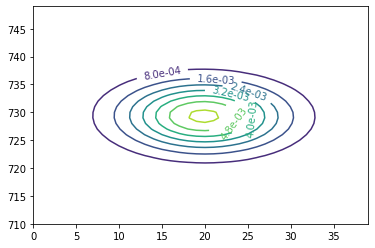

In [13]:
import numpy as np

x, y = np.mgrid[0:40, 710:750]
pos = np.empty(x.shape +(2,))
pos[:,:,0] = x
pos[:,:,1] = y
cont = plt.contour(x, y, irlidar.pdf(pos))
cont.clabel(fmt='%1.1e')

plt.show()

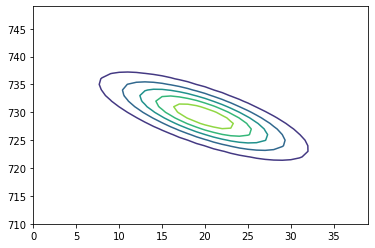

In [19]:
c = d.cov().values + np.array([[0,-20],[-20,0]])
tmp = multivariate_normal(mean=d.mean().values.T, cov=c)
cont = plt.contour(x,y,tmp.pdf(pos))
plt.show()